In [61]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Target'] = housing.target  # median house value in $100,000s

# Check for nulls
print("Missing values:\n", df.isnull().sum())


Missing values:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


In [62]:
# Optional: Clean data if needed (no nulls here)
df.dropna(inplace=True)


In [63]:
print(" Dataset shape:", df.shape)
df.head()

 Dataset shape: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [64]:
# Quick info
print(df.info())
print("\nNull values:\n", df.isnull().sum())
print("\nStatistical Summary:\n", df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Null values:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

Statistical Summary:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.42

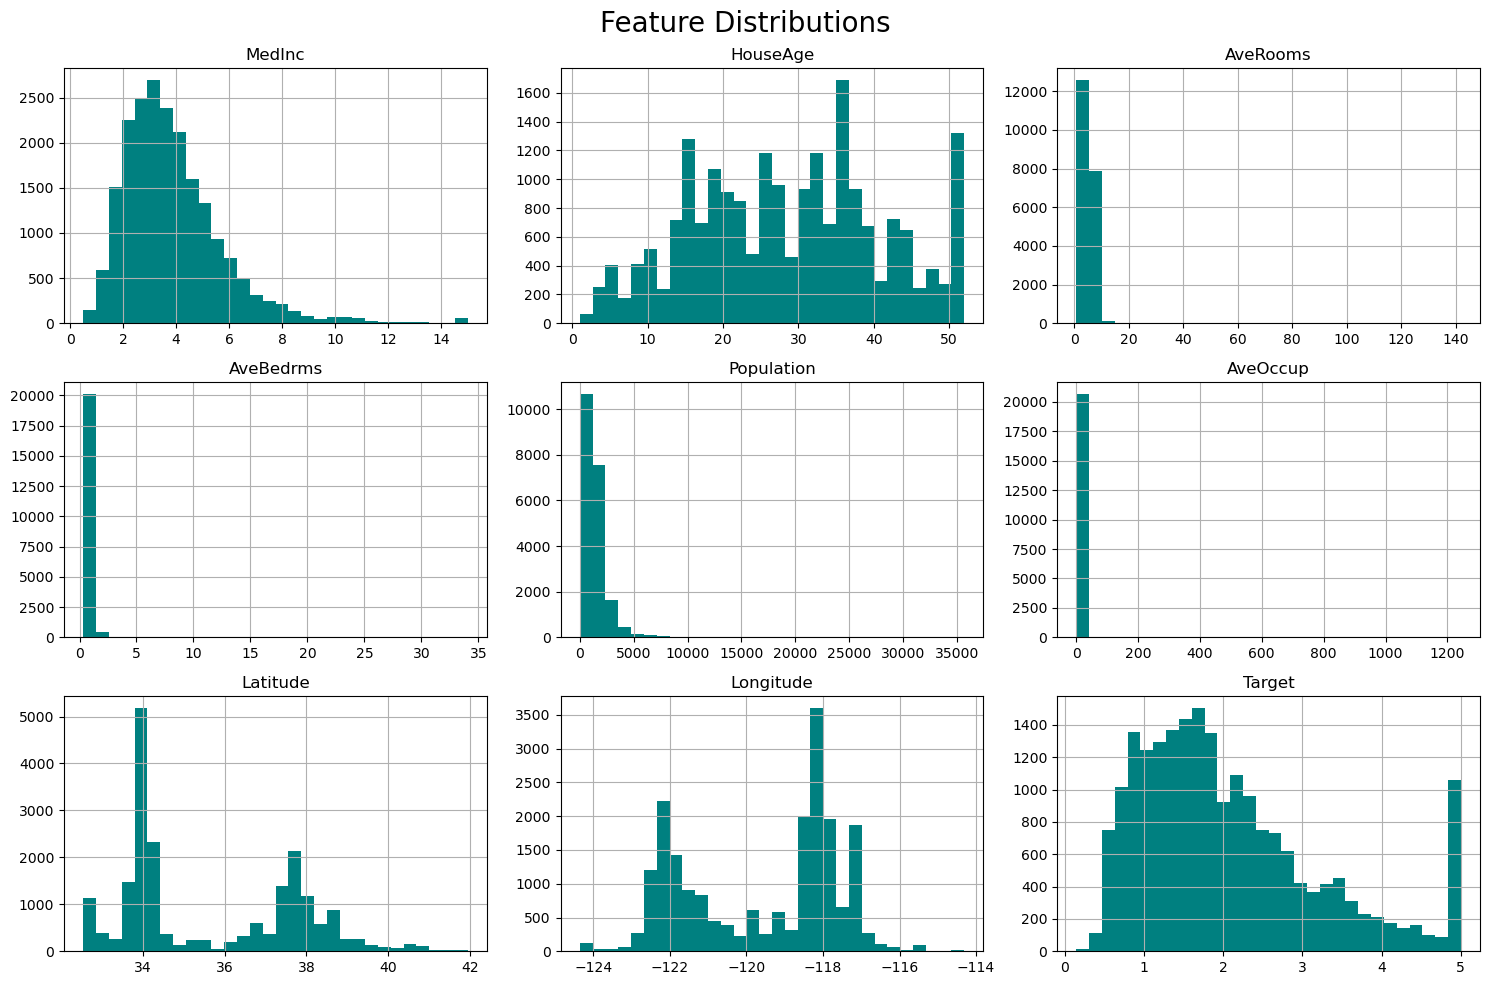

In [65]:
# Histograms for all features
df.hist(bins=30, figsize=(15, 10), color='teal')
plt.suptitle("Feature Distributions", fontsize=20)
plt.tight_layout()
plt.show()


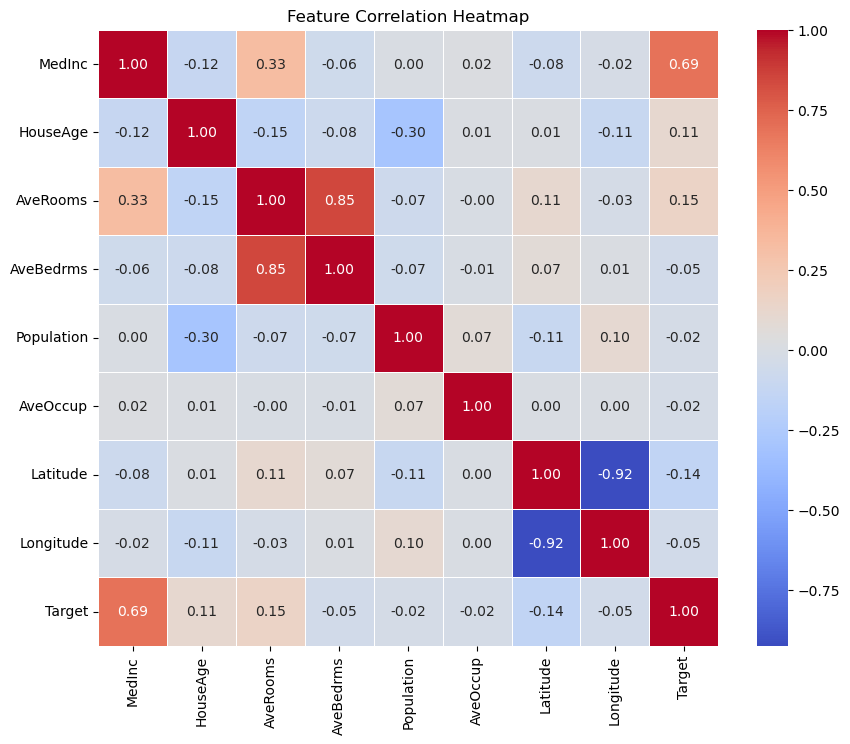

In [66]:
# Correlation matrix
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


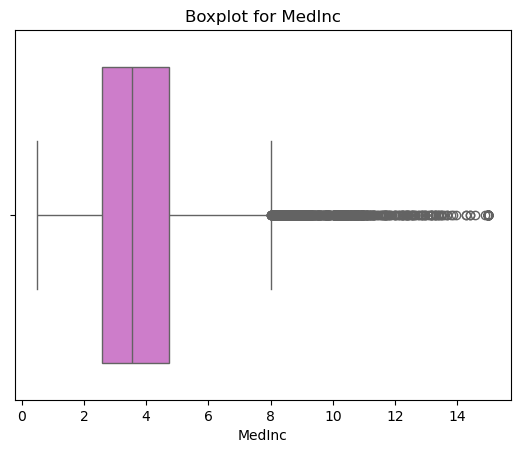

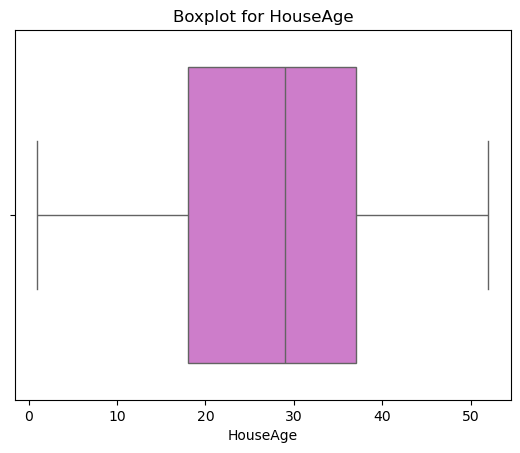

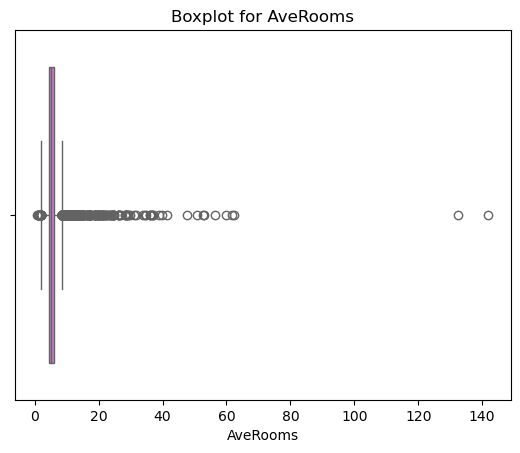

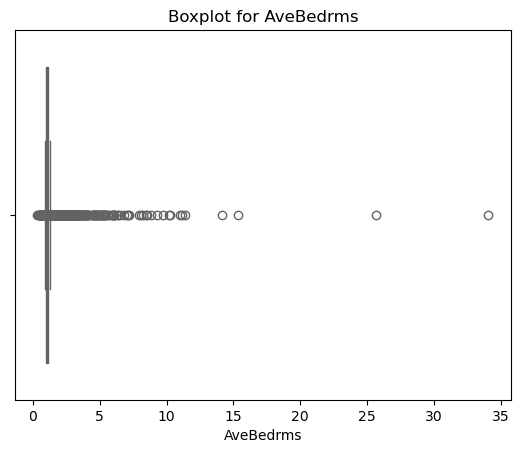

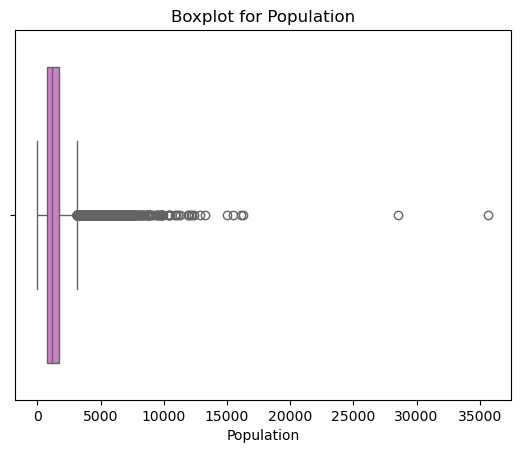

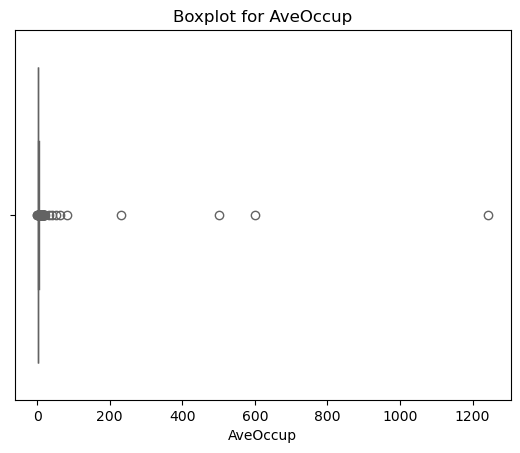

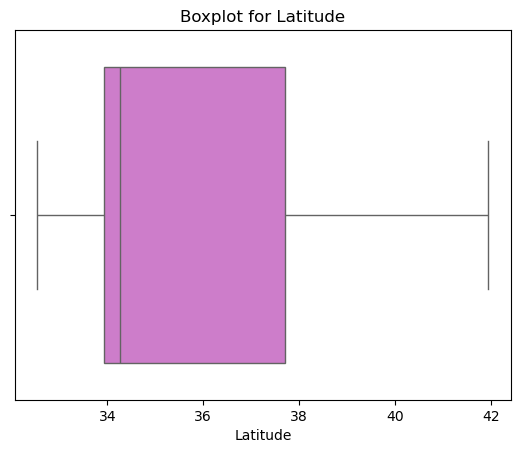

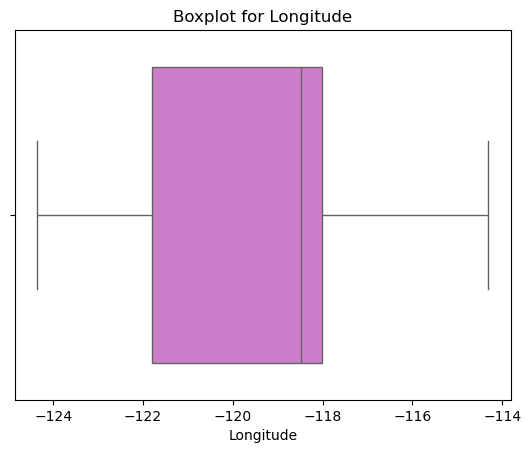

In [67]:
for col in df.columns[:-1]:
    sns.boxplot(x=df[col], color='orchid')
    plt.title(f"Boxplot for {col}")
    plt.show()


In [90]:
# 📦 1. Import everything
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [92]:
# 🏡 2. Load & split dataset
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [94]:
# 📏 3. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [96]:
# 🧠 4. Train Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [98]:
# 📊 6. Evaluate the model
y_pred = model.predict(X_test_scaled)
y_pred_clipped = np.maximum(y_pred, 0)

mse = mean_squared_error(y_test, y_pred_clipped)
r2 = r2_score(y_test, y_pred_clipped)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 0.5396
R² Score: 0.5922


In [100]:
# 🔮 7. Make a positive prediction manually
# Luxury input
sample_input = pd.DataFrame([{
    'MedInc': 15.0,
    'HouseAge': 5,
    'AveRooms': 10.0,
    'AveBedrms': 1.5,
    'Population': 200,
    'AveOccup': 2.0,
    'Latitude': 37.88,
    'Longitude': -122.25
}])

sample_scaled = scaler.transform(sample_input)
raw_pred = model.predict(sample_scaled)[0]
prediction = max(raw_pred, 0)

print(f"💰 Raw Prediction: {raw_pred}")
print(f"💸 Final Predicted Price: ${prediction * 100000:,.2f}")


💰 Raw Prediction: 6.799889115374154
💸 Final Predicted Price: $679,988.91


In [102]:
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']